In [1]:
# Package Imports
import pandas as pd
import numpy as np
import datetime

## Single Trial AAPL

In [2]:
data = pd.read_csv('csv/AAPL.csv')

In [3]:
data

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,12-12-1980,0.128348,0.128348,469033600,0.128906,0.128348,0.100453
1,15-12-1980,0.121652,0.122210,175884800,0.122210,0.121652,0.095213
2,16-12-1980,0.112723,0.113281,105728000,0.113281,0.112723,0.088224
3,17-12-1980,0.115513,0.115513,86441600,0.116071,0.115513,0.090408
4,18-12-1980,0.118862,0.118862,73449600,0.119420,0.118862,0.093029
...,...,...,...,...,...,...,...
10339,14-12-2021,172.210007,175.250000,139380400,177.740005,174.330002,174.330002
10340,15-12-2021,172.309998,175.110001,131063300,179.500000,179.300003,179.300003
10341,16-12-2021,170.750000,179.279999,150185800,181.139999,172.259995,172.259995
10342,17-12-2021,169.690002,169.929993,195432700,173.470001,171.139999,171.139999


#### Will only keep Data and Adjusted Close

In [4]:
data = data[['Date','Adjusted Close']]
data.head()

,Date,Adjusted Close
0,12-12-1980,0.100453
1,15-12-1980,0.095213
2,16-12-1980,0.088224
3,17-12-1980,0.090408
4,18-12-1980,0.093029


AAPL report dates:
10/29/2021
10/19/2021
9/15/2021
7/28/2021
6/11/2021
4/29/2021
1/28/2021
10/30/2020

In [5]:
# Need convert date format
convert = lambda x : datetime.datetime.strptime(x, '%d-%m-%Y').strftime('%Y-%m-%d')

In [6]:
convert('30-10-2020')

'2020-10-30'

In [7]:
data['Date'] = data['Date'].apply(convert)

/var/folders/lp/vfvt67_51bb90pl2wfgm0x8m0000gn/T/ipykernel_4731/3080872853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = data['Date'].apply(convert)


In [8]:
data

,Date,Adjusted Close
0,1980-12-12,0.100453
1,1980-12-15,0.095213
2,1980-12-16,0.088224
3,1980-12-17,0.090408
4,1980-12-18,0.093029
...,...,...
10339,2021-12-14,174.330002
10340,2021-12-15,179.300003
10341,2021-12-16,172.259995
10342,2021-12-17,171.139999


In [9]:
# Since we are looking data after 10/30/2020, drop irrelavant dates
#idx = data.index[data['Date'] == '2020-10-30'][0]
#data = data[idx:]
#data.head()

In [10]:
# time range for 7-days, 14-days, 30-days, 90-days
#data = data.reset_index()
# 7 weekdays
t = 7
idx_s = 0
idx_e = idx_s + t
data_ = data[idx_s:idx_e]
mean_ = np.mean(data_['Adjusted Close'])
mean_

0.09564923495054238

In [11]:
# Wrap into functions
def find_ind(data, date):
    return data.index[data['Date'] == date][0]

In [12]:
# Wrap into functions
def fetch_means(date, data, t_range_list):
    idx_s = find_ind(data,date)
    p = data['Adjusted Close'][idx_s]
    d = dict()
    d['Initial Price'] = p
    for i in t_range_list[1:]:
        t = i
        idx_e = idx_s + t
        data_ = data[idx_s:idx_e]
        mean_ = np.mean(data_['Adjusted Close'])
        d[str(t)+' days'] = mean_
        if mean_ > p :
            d[str(t)+' days label'] = True
        else:
            d[str(t)+' days label'] = False
    return d

In [13]:
fetch_means('2020-10-30',data,[1,5,10,20,60])

{'Initial Price': 108.00666809082033,
 '5 days': 111.52884521484376,
 '5 days label': True,
 '10 days': 114.37112503051758,
 '10 days label': True,
 '20 days': 115.55572280883788,
 '20 days label': True,
 '60 days': 124.2913038889567,
 '60 days label': True}

In [35]:
time_lists = ['10/29/2021', '10/19/2021', '9/15/2021', '7/28/2021', '6/11/2021', '4/29/2021', '1/28/2021', '10/30/2020']

In [25]:
time_lists = ['2021-08-30', '2021-08-26', '2021-08-17', '2021-09-28',
       '2021-09-01', '2021-09-14', '2021-09-20', '2021-10-04',
       '2021-10-05', '2021-06-22']

In [36]:
a_con = lambda x : datetime.datetime.strptime(x, '%m/%d/%Y').strftime('%Y-%m-%d')

In [44]:
time_list = [a_con(i) for i in time_lists]
time_list = sorted(time_list)

In [45]:
time_list

['2020-10-30',
 '2021-01-28',
 '2021-04-29',
 '2021-06-11',
 '2021-07-28',
 '2021-09-15',
 '2021-10-19',
 '2021-10-29']

In [46]:
aapl = dict()
for i in time_list:
    aapl[i] = fetch_means(i,data,[1,5,10,20,60])

In [47]:
data

,Date,Adjusted Close
0,1980-12-12,0.100453
1,1980-12-15,0.095213
2,1980-12-16,0.088224
3,1980-12-17,0.090408
4,1980-12-18,0.093029
...,...,...
10339,2021-12-14,174.330002
10340,2021-12-15,179.300003
10341,2021-12-16,172.259995
10342,2021-12-17,171.139999


In [48]:
AAPL_df = pd.DataFrame(aapl)
AAPL_df.T

,Initial Price,5 days,5 days label,10 days,10 days label,20 days,20 days label,60 days,60 days label
2020-10-30,108.006668,111.528845,True,114.371125,True,115.555723,True,124.291304,True
2021-01-28,136.250031,133.600375,False,134.708992,False,131.67006,False,127.246951,False
2021-04-29,132.860397,130.079375,False,128.378212,False,127.093913,False,132.508986,False
2021-06-11,126.974167,129.498694,True,130.938434,True,134.93112,True,143.36623,True
2021-07-28,144.552139,145.441504,True,145.754178,True,147.055829,True,146.765451,True
2021-09-15,148.812805,145.837149,False,145.500644,False,143.633871,False,150.52918,True
2021-10-19,148.543198,148.748904,True,149.215228,True,149.613645,True,158.657339,True
2021-10-29,149.581696,150.027048,True,149.845523,True,153.126762,True,160.752646,True


In [50]:
AAPL_df.to_csv('old_AAPL_labels.csv')

In [124]:
import matplotlib.pyplot as plt

<AxesSubplot:>

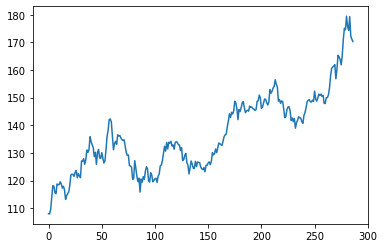

In [128]:
data['Adjusted Close'].plot()